# Overview Data
**Sumber : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python**

**Context**
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content**
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Mall_Customers.csv')

In [3]:
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


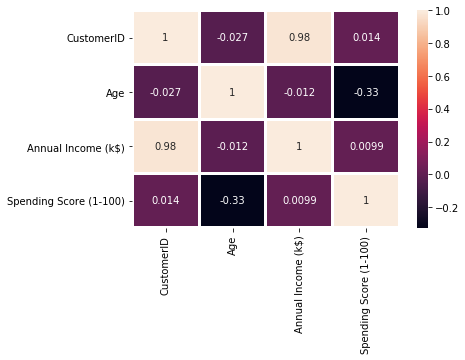

In [4]:
# Matrix Korelasi
sns.heatmap(dataframe.corr(),annot=True,linewidths=2)
plt.show()

# Pemisahan Data

In [5]:
dataframe = dataframe.iloc[:,3:]

In [6]:
dataframe.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Visualisasi Data

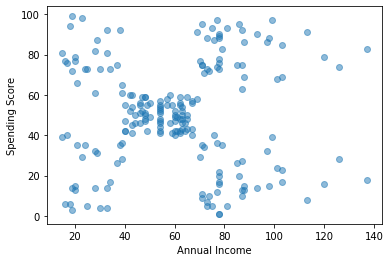

In [7]:
plt.scatter(dataframe['Annual Income (k$)'],dataframe['Spending Score (1-100)'],alpha=0.5)
plt.ylabel('Spending Score')
plt.xlabel('Annual Income')
plt.show()

# Mencari Jumlah Kelas
Jumlah kelas terletak pada siku graf

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    model.fit(dataframe)
    wcss.append(model.inertia_)

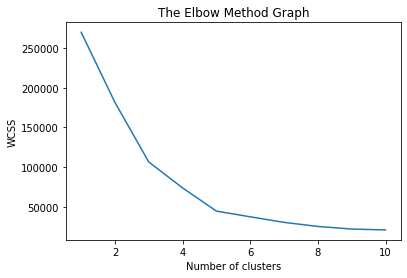

In [10]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Mean Kluster

In [11]:
model = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [12]:
y_kmeans = model.fit_predict(dataframe)

# Visualisasi Kluster

In [13]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

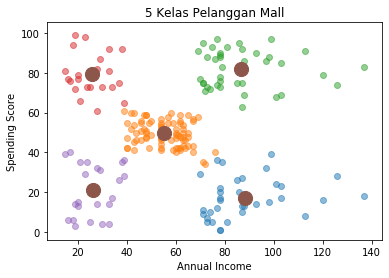

In [14]:
plt.title('5 Kelas Pelanggan Mall')
for i in range(5):
    # Plot Setiap Kelas
    plt.scatter(dataframe['Annual Income (k$)'][y_kmeans == i],dataframe['Spending Score (1-100)'][y_kmeans == i],alpha=0.5)

# Temukan Tengah Kelas
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, label = 'Centroids')
plt.ylabel('Spending Score')
plt.xlabel('Annual Income');

# Input Kelas Dalam DataFrame

In [15]:
import numpy as np

In [37]:
placeholder = np.zeros(shape=(200))

In [38]:
for i in range(5):
    placeholder[y_kmeans == i] = i

In [39]:
dataframe['Class'] = placeholder.astype(np.int)

In [40]:
dataframe.head()

,Annual Income (k$),Spending Score (1-100),Class
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
